In [ ]:
import os

competition = "euroleague"
season = 2024
width = 850
height = round(width * 88/63)
couleur_fond = "#E0B084"
font_path_bold = "police_ecriture/GothamBoldItalic.ttf" 
text_color = "black"
border_size = 20
border_color = "#A67C00" 
dossier_path = f'images/{competition}_{season}_players'  # Remplacez par le chemin de votre dossier

# Liste pour stocker les noms des fichiers PNG sans l'extension
png_files = []

# Parcourir le dossier et ajouter les noms des fichiers PNG à la liste
for filename in os.listdir(dossier_path):
    if filename.endswith('.png'):
        # Retirer l'extension .png et ajouter à la liste
        name_without_extension = filename[:-4]  # Retire les 4 derniers caractères ('.png')
        png_files.append(name_without_extension)

data = pd.read_csv(f"datas/{competition}_idplayers_{season}.csv")


folder_path = f"panini_card/{competition}_{season}"

# Vérifier si le dossier existe, sinon le créer
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")
    


for index, row in data.iterrows():

    id_players = row["PLAYER_ID"]
    name_players = row["PLAYER"]
    name_players = f"{name_players.split(', ')[1]}  {name_players.split(', ')[0]}"
    team = row["CODETEAM"]

    if id_players in png_files :



        panini_image = Image.new("RGB", (width, height), couleur_fond)

        #PLAYER
        player_image_path = f"images/{competition}_{season}_players/{id_players}.png"
        player_image = Image.open(player_image_path)
        player_image = player_image.resize((815,1087), Image.Resampling.LANCZOS)
        
        player_image = player_image.convert("RGBA")
        _bg = Image.new("RGBA", player_image.size, couleur_fond)
        player_image_with_bg = Image.alpha_composite(_bg, player_image)
        player_image_with_bg = player_image_with_bg.convert("RGB")
        panini_image.paste(player_image_with_bg, (round((width - 815)/2), 0))

        #TEAM
        player_image_path = f"images/{competition}_{season}_teams/{team}.png"
        player_image = Image.open(player_image_path)
        new_size = (int(player_image.width * 1.5), int(player_image.height * 1.5))
        competition_image = player_image.resize(new_size, Image.Resampling.LANCZOS)
        player_image = player_image.convert("RGBA")
        _bg = Image.new("RGBA", player_image.size, couleur_fond)
        player_image_with_bg = Image.alpha_composite(_bg, player_image)
        player_image_with_bg = player_image_with_bg.convert("RGB")
        panini_image.paste(player_image_with_bg, (40, 50))

        #COMPETITON
        competition_image_path = f"images/{competition}_little.png"
        competition_image = Image.open(competition_image_path)
        new_size = (int(competition_image.width * 0.25), int(competition_image.height * 0.25))
        competition_image = competition_image.resize(new_size, Image.Resampling.LANCZOS)
        competition_image = competition_image.convert("RGBA")
        _bg = Image.new("RGBA", competition_image.size, couleur_fond)
        competition_image_with_bg = Image.alpha_composite(_bg, competition_image)
        competition_image_with_bg = competition_image_with_bg.convert("RGB")
        panini_image.paste(competition_image_with_bg, (width - 200, 60))

        draw = ImageDraw.Draw(panini_image)

        # Définir les coordonnées du bandeau
        x0, y0 = 0, height - 200
        x1, y1 = width, height

        # Dessiner le bandeau
        draw.rectangle([x0, y0, x1, y1 + 100], fill="#E0B084")

        #NOM DU JOUEUR
        font_size = 100
        text_width = width 
        text_height = height
        while (text_width > width - 60) | (text_height>155) :
            bbox = draw.textbbox((0, 0), name_players, font=ImageFont.truetype(font_path_bold, font_size))  # Obtenir les coordonnées de la boîte
            text_width = bbox[2] - bbox[0]  # Largeur = x_max - x_min
            text_height = bbox[3] - bbox[1]  # Hauteur = y_max - y_min
            font_size -= 1


        # Calculer la position x pour centrer le texte
        text_position_x = (panini_image.width - text_width) // 2  # Position x centrée
        text_position_y = 1002 + round((155-text_height)/2)  # Position y centrée

        draw.text((text_position_x, text_position_y), name_players, fill=text_color, font=ImageFont.truetype(font_path_bold, font_size))


        # BORDURE
        # Créer l'image avec le contour doré
        panini_image = ImageOps.expand(panini_image, border=border_size, fill=border_color)

        panini_image.save(f"{folder_path}/{team}_card_{id_players}.png")


In [20]:
from PIL import Image, ImageOps,ImageDraw,ImageFont
import pandas as pd
import os
import random

competition = "euroleague"
season = 2024
text_color = "black"
border_size = 20
data = pd.read_csv(f"datas/{competition}_idplayers_{season}.csv")
CODETEAM = data["CODETEAM"].unique().tolist()
width = 850 - 60
height = round(850 * 88/63) - 60

if competition == "euroleague" :
    background_color = "#FEB673"
    border_color = "#E9540D"  # Color code for the background
else : 
    background_color = "#87C2FA"
    border_color = "#0971CE"

panini_image = Image.new("RGB", (width, height), "black" )





#COMPETITON LITTLE
competition_image_path = f"images/{competition}_little.png"
competition_image = Image.open(competition_image_path)
taille = 500
competition_image = competition_image.resize((taille,taille), Image.Resampling.LANCZOS)
competition_image = competition_image.convert("RGBA")
panini_image.paste(competition_image, (int((width - taille)/2), int((height - taille)/2)), mask=competition_image)


panini_image = ImageOps.expand(panini_image, border=border_size, fill=background_color)

panini_image.save(f"panini_verso_{competition}_{season}.png")

In [7]:
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np

def plot_semi_circular_chart(value):
    """
    Plot a semi-circular chart with the filled portion in green and the empty portion in red.
    """
    # Validate input value
    if not 0 <= value <= 1:
        raise ValueError("Value must be between 0 and 1.")

    # Define the angles for the semi-circle
    theta = np.linspace(0, np.pi, 100)

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': 'polar'})

    # Create the semi-circular filled portion (green)
    theta_filled = np.linspace(0, value * np.pi, 100)
    ax.bar(theta_filled, np.ones_like(theta_filled), width=np.pi/100, color='green', edgecolor='none')

    # Create the semi-circular empty portion (red)
    theta_empty = np.linspace(value * np.pi, np.pi, 100)
    ax.bar(theta_empty, np.ones_like(theta_empty), width=np.pi/100, color='red', edgecolor='none')

    # Remove unnecessary elements
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines['polar'].set_visible(False)

    # Set a title or label
    ax.text(0, 1.2, f"{int(value * 100)}%", ha='center', fontsize=14)

    # Adjust plot limits for better appearance
    ax.set_ylim(0, 1.5)

    return fig

In [9]:
fig = plot_semi_circular_chart(80 / 100)
st.pyplot(fig)


2024-11-22 14:34:22.129 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 14:34:22.374 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 14:34:22.525 
  command:

    streamlit run C:\Users\guill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-22 14:34:22.526 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [46]:
from PIL import Image, ImageOps,ImageDraw,ImageFont
import pandas as pd
import os
import random

competition = "euroleague"
season = 2024
text_color = "black"
border_size = 20
data = pd.read_csv(f"datas/{competition}_idplayers_{season}.csv")
CODETEAM = sorted(data["CODETEAM"].unique().tolist())
width = 850 - 60
height = round(850 * 88/63) - 60

if competition == "euroleague" :
    background_color = "#FEB673"
    border_color = "#E9540D"  # Color code for the background
else : 
    background_color = "#87C2FA"
    border_color = "#0971CE"

panini_image = Image.new("RGB", (width, height), "grey" )

for j in range(5) :
        team_image_path = f"images/{competition}_{season}_teams/{CODETEAM[j]}.png"
        team_image = Image.open(team_image_path)
        team_image = team_image.resize((158,158), Image.Resampling.LANCZOS)
        team_image = team_image.convert("RGBA")
        panini_image.paste(team_image, (158*j, 0), mask=team_image)

        team_image_path = f"images/{competition}_{season}_teams/{CODETEAM[13+j]}.png"
        team_image = Image.open(team_image_path)
        team_image = team_image.resize((158,158), Image.Resampling.LANCZOS)
        team_image = team_image.convert("RGBA")
        panini_image.paste(team_image, (158*j, 969), mask=team_image)

for j in range(4) :
        team_image_path = f"images/{competition}_{season}_teams/{CODETEAM[5+j*2]}.png"
        team_image = Image.open(team_image_path)
        team_image = team_image.resize((158,158), Image.Resampling.LANCZOS)
        team_image = team_image.convert("RGBA")
        panini_image.paste(team_image, (0, int((158 + 35.8) + 158*j + 35.8*j)), mask=team_image)

for j in range(4) :
        team_image_path = f"images/{competition}_{season}_teams/{CODETEAM[6+(j)*2]}.png"
        team_image = Image.open(team_image_path)
        team_image = team_image.resize((158,158), Image.Resampling.LANCZOS)
        team_image = team_image.convert("RGBA")
        panini_image.paste(team_image, (632, int((158 + 35.8) + 158*j + 35.8*j)), mask=team_image)


competition_image_path = f"images/{competition}.png"
competition_image = Image.open(competition_image_path)

competition_image = competition_image.rotate(90, expand=True)

competition_image = competition_image.convert("RGBA")
panini_image.paste(competition_image,( 158 + 171, 158 + 105), mask=competition_image)



panini_image = ImageOps.expand(panini_image, border=border_size, fill=background_color)

panini_image.save(f"panini_verso_{competition}_{season}.png")

In [38]:
import pandas as pd
import itertools
import warnings

# Ignora todos os warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("datas/euroleague_five_evol_2023.csv")
id_players = pd.read_csv("datas/euroleague_idplayers_2023.csv")
df = df[df["CODETEAM"] == "MCO"].reset_index(drop  =True)
id_players = id_players[id_players["CODETEAM"] == "MCO"].reset_index(drop  =True)

df["P"] = df["P1"] + " " +  df["P2"] + " " +  df["P3"] + " " +  df["P4"] + " " +  df["P5"]
unique_code_players = list(set(df["P1"]) | set(df["P2"]) | set(df["P3"]) | set(df["P4"]) | set(df["P5"]))

df2 = df[["TIME","DELTA_SCORE","P"]]

# Étape 2 : Créer df3 en utilisant groupby et agg
df3 = df2.groupby('P').agg(
    TIME=('TIME', 'sum'),            # Somme de TIME
    DELTA_SCORE=('DELTA_SCORE', 'sum')  # Somme de DELTA_SCORE
).reset_index()  # Réinitialiser l'index pour garder P comme colonne


for ucp in unique_code_players:
    df3[ucp] = df3["P"].apply(lambda x: 1 if ucp in x else 0)

for ucp1, ucp2 in itertools.combinations(unique_code_players, 2):
    col_name = f"{ucp1}_{ucp2}"
    df3[col_name] = df3["P"].apply(lambda x: 1 if ucp1 in x and ucp2 in x else 0)

for ucp1, ucp2, ucp3 in itertools.combinations(unique_code_players, 3):
    col_name = f"{ucp1}_{ucp2}_{ucp3}"
    df3[col_name] = df3["P"].apply(lambda x: 1 if ucp1 in x and ucp2 in x and ucp3 in x else 0)

df3 = df3.loc[:, (df3 != 0).any(axis=0)]
df3 = df3.drop(columns=['P'])
df3["PM_MIN"] = df3["DELTA_SCORE"] / df3["TIME"]
df3 = df3.drop(columns=['DELTA_SCORE'])

In [39]:
import statsmodels.api as sm

# Supposons que df2 est déjà défini et contient les colonnes nécessaires

# Définissez la variable cible (Y) et les variables explicatives (X)
Y = df3['PM_MIN']  # Variable cible
X = df3.drop(columns=['PM_MIN', 'TIME'])  # Variables explicatives (toutes les colonnes sauf PM_MIN et TIME)

# Créez le modèle de régression linéaire sans constante
model = sm.WLS(Y, X, weights=df3['TIME'])  # Utilisez WLS pour la régression avec des poids

# Ajustez le modèle
results = model.fit()

# Extraire les coefficients
coefficients = results.params

# Créer un DataFrame pour les coefficients et leurs valeurs absolues
coeffs_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Absolute Value': coefficients.abs()
})

# Trier le DataFrame par valeur absolue des coefficients
sorted_coeffs_df = coeffs_df.sort_values(by='Absolute Value', ascending=False)

sorted_coeffs_df.index.name = 'players'  # Renommer l'index

sorted_coeffs_df = sorted_coeffs_df.reset_index()

for index,row in  id_players.iterrows():
    sorted_coeffs_df['players'] = sorted_coeffs_df['players'].str.replace(row["PLAYER_ID"], row["PLAYER"].split(",")[0], regex=False)


In [7]:
from euroleague_api.play_by_play_data import PlayByPlay 
from euroleague_api.shot_data import ShotData
import warnings
import pandas as pd
import statsmodels.api as sm
import numpy as np
# Masquer tous les warnings
warnings.filterwarnings("ignore")
import random

In [ ]:
competition ="euroleague"
season = 2023

data_pbp = pd.DataFrame(columns=[])
data_sd = pd.DataFrame(columns=[])

if competition == "euroleague" :
    pbp_ = PlayByPlay(competition="E")
    sd_ = ShotData(competition="E")
else :
    pbp_ = PlayByPlay(competition="U")
    sd_ = ShotData(competition="U")


for gc in range(306) : 
    gamecode=gc + 1
    print(gamecode)
    pbp = pbp_.get_game_play_by_play_data(season=season, gamecode=gamecode)
    sd = sd_.get_game_shot_data(season=season,gamecode=gamecode)
    data_pbp = pd.concat([data_pbp,pbp])
    data_sd = pd.concat([data_sd,sd])

In [55]:
data_sd["DISTANCE"] = ((data_sd["COORD_X"])**2 + (data_sd["COORD_Y"])**2  )**0.5

data_sd["EVAL"] = np.where(
    data_sd["POINTS"] > 0, 
    data_sd["POINTS"], 
    np.clip((data_sd["DISTANCE"] / 800) - 1, -1, 0)
)

data_sd["MADE"] = (data_sd["POINTS"] > 0).astype(int)


In [ ]:
CODETEAM = [1]
if CODETEAM :
    print("ok")

In [ ]:
data_sd_log = data_sd[data_sd["ID_ACTION"]!="FTM"][["MADE","DISTANCE"]]
data_sd_log["DISTANCE_SQUARED"] = data_sd_log["DISTANCE"] ** 2

# Créer la colonne "DISTANCE_CUBED" comme le cube de "DISTANCE"
data_sd_log["DISTANCE_CUBED"] = data_sd_log["DISTANCE"] ** 3

# Définir les variables indépendantes (X) et la variable dépendante (y)
X = data_sd_log[["DISTANCE", "DISTANCE_SQUARED", "DISTANCE_CUBED"]]
y = data_sd_log["MADE"]

# Ajouter une constante (intercept) à X
X = sm.add_constant(X)

# Effectuer la régression logistique
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Afficher le résumé des résultats du modèle
print(result.summary())

# Mettre à jour les coefficients du modèle
beta_0 = result.params['const']
beta_1 = result.params['DISTANCE']
beta_2 = result.params['DISTANCE_SQUARED']
beta_3 = result.params['DISTANCE_CUBED']

In [ ]:

def predict_probability(distance):
    # Calculer la valeur linéaire z
    z = beta_0 + beta_1 * distance + beta_2 * (distance ** 2) + beta_3 * (distance ** 3)
    
    # Calculer la probabilité en utilisant la fonction sigmoïde
    probability = 1 / (1 + np.exp(-z))
    
    return probability

# Exemple d'utilisation
distance = 0  # Par exemple, une distance de 500
proba = predict_probability(distance)
print(f"La probabilité de réussite pour une distance de {distance} est : {proba:.4f}")


In [42]:
data_sd2 = data_sd[["Season","Gamecode","NUM_ANOT","DISTANCE"]]
data_sd2.columns = ["Season","Gamecode","NUMBEROFPLAY","DISTANCE"]
data_pbp = pd.merge(data_pbp, data_sd2, 
                  how="left", 
                  on=["Season","Gamecode","NUMBEROFPLAY"])

In [20]:
from euroleague_api.boxscore_data import BoxScoreData 
import pandas as pd
bs = BoxScoreData(competition="E")
# Définir la fonction d'agrégation personnalisée
def custom_agg(group):
    return pd.Series({
        f'{col}_max': group[col].max(),
        f'{col}_second_largest': group[col].nlargest(2).iloc[1] if len(group[col]) > 1 else None,
        f'{col}_third_largest': group[col].nlargest(3).iloc[2] if len(group[col]) > 2 else None
    } for col in group.columns if col != 'Home')

cart = pd.DataFrame(columns=[])
for season in [2022,2023] : 
    for gc in range(1,307) :
        print(gc)
        bs_ =  bs.get_player_boxscore_stats_data(season=season, gamecode=gc)
        bs_ = bs_[(bs_["Dorsal"]!="")&(~bs_["Dorsal"].isnull())].reset_index(drop = True)

        home_max_plusminus = bs_.groupby('Home')['Plusminus'].sum().idxmax()
        bs_['Minutes'] = bs_['Minutes'].replace('DNP', '00:00').apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60)
        bs_ = bs_[['Home',"Points","OffensiveRebounds","DefensiveRebounds","TotalRebounds","Assistances","Steals","Turnovers"]]
        
        # Appliquer la fonction avec groupby().apply()
        result = bs_.groupby('Home').apply(custom_agg).reset_index()

        result_clean = pd.concat(
            [result[['Home']], pd.json_normalize(result.drop(columns=['Home']).to_dict(orient='records'))],
            axis=1
        )

        result_clean.columns = [col[2:] if col != 'Home' else col for col in result_clean.columns]

        result_clean["WINNER"] = (result_clean["Home"] == home_max_plusminus)

        result_clean = result_clean.drop(columns="Home")

        cart = pd.concat([cart,result_clean])

C:\Users\guill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


2


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


3


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


4


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


5


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


6


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


7


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


8


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


9


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


10


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


11


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


12


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


13


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


14


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


15


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


16


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


17


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


18


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


19


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


20


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


21


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


22


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


23


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


24


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


25


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


26


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


27


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


28


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


29


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


30


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


31


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


32


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


33


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


34


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


35


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


36


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


37


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


38


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


39


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


40


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


41


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


42


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


43


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


44


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


45


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


46


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


47


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


48


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


49


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


50


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


51


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


52


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


53


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


54


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


55


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


56


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


57


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


58


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


59


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


60


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


61


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


62


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


63


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


64


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


65


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


66


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


67


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


68


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


69


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


70


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


71


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


72


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


73


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


74


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


75


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


76


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


77


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


78


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


79


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


80


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


81


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


82


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


83


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


84


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


85


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


86


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


87


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


88


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


89


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


90


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


91


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


92


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


93


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


94


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


95


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


96


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


97


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


98


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


99


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


100


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


101


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


102


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


103


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


104


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


105


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


106


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


107


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


108


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


109


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


110


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


111


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


112


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


113


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


114


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


115


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


116


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


117


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


118


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


119


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


120


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


121


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


122


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


123


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


124


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


125


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


126


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


127


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


128


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


129


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


130


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


131


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


132


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


133


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


134


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


135


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


136


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


137


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


138


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


139


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


140


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


141


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


142


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


143


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


144


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


145


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


146


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


147


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


148


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


149


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


150


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


151


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


152


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


153


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


154


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


155


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


156


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


157


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


158


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


159


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


160


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


161


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


162


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


163


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


164


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


165


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


166


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


167


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


168


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


169


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


170


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


171


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


172


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


173


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


174


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


175


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


176


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


177


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


178


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


179


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


180


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


181


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


182


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


183


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


184


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


185


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


186


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


187


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


188


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


189


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


190


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


191


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


192


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


193


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


194


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


195


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


196


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


197


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


198


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


199


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


200


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


201


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


202


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


203


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


204


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


205


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


206


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


207


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


208


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


209


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


210


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


211


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


212


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


213


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


214


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


215


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


216


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


217


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


218


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


219


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


220


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


221


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


222


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


223


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


224


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


225


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


226


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


227


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


228


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


229


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


230


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


231


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


232


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


233


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


234


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


235


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


236


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


237


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


238


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


239


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


240


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


241


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


242


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


243


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


244


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


245


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


246


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


247


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


248


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


249


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


250


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


251


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


252


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


253


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


254


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


255


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


256


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


257


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


258


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


259


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


260


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


261


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


262


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


263


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


264


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


265


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


266


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


267


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


268


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


269


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


270


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


271


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


272


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


273


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


274


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


275


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


276


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


277


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


278


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


279


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


280


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


281


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


282


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


283


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


284


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


285


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


286


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


287


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


288


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


289


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


290


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


291


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


292


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


293


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


294


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


295


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


296


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


297


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


298


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


299


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


300


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


301


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


302


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


303


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


304


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


305


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


306


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


1


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


2


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


3


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


4


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


5


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


6


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


7


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


8


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


9


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


10


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


11


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


12


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


13


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


14


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


15


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


16


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


17


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


18


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


19


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


20


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


21


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


22


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


23


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


24


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


25


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


26


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


27


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


28


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


29


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


30


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


31


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


32


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


33


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


34


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


35


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


36


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


37


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


38


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


39


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


40


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


41


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


42


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


43


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


44


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


45


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


46


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


47


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


48


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


49


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


50


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


51


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


52


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


53


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


54


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


55


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


56


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


57


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


58


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


59


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


60


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


61


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


62


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


63


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


64


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


65


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


66


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


67


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


68


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


69


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


70


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


71


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


72


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


73


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


74


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


75


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


76


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


77


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


78


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


79


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


80


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


81


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


82


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


83


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


84


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


85


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


86


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


87


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


88


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


89


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


90


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


91


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


92


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


93


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


94


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


95


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


96


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


97


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


98


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


99


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


100


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


101


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


102


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


103


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


104


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


105


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


106


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


107


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


108


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


109


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


110


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


111


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


112


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


113


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


114


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


115


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


116


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


117


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


118


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


119


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


120


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


121


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


122


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


123


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


124


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


125


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


126


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


127


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


128


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


129


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


130


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


131


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


132


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


133


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


134


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


135


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


136


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


137


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


138


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


139


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


140


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


141


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


142


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


143


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


144


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


145


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


146


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


147


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


148


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


149


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


150


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


151


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


152


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


153


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


154


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


155


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


156


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


157


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


158


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


159


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


160


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


161


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


162


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


163


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


164


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


165


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


166


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


167


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


168


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


169


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


170


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


171


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


172


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


173


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


174


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


175


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


176


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


177


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


178


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


179


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


180


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


181


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


182


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


183


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


184


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


185


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


186


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


187


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


188


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


189


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


190


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


191


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


192


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


193


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


194


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


195


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


196


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


197


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


198


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


199


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


200


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


201


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


202


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


203


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


204


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


205


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


206


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


207


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


208


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


209


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


210


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


211


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


212


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


213


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


214


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


215


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


216


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


217


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


218


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


219


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


220


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


221


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


222


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


223


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


224


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


225


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


226


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


227


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


228


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


229


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


230


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


231


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


232


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


233


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


234


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


235


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


236


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


237


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


238


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


239


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


240


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


241


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


242


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


243


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


244


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


245


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


246


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


247


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


248


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


249


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


250


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


251


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


252


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


253


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


254


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


255


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


256


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


257


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


258


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


259


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


260


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


261


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


262


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


263


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


264


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


265


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


266


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


267


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


268


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


269


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


270


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


271


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


272


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


273


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


274


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


275


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


276


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


277


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


278


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


279


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


280


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


281


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


282


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


283


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


284


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


285


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


286


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


287


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


288


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


289


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


290


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


291


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


292


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


293


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


294


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


295


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


296


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


297


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


298


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


299


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


300


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


301


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


302


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


303


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


304


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


305


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


306


C:\Users\guill\AppData\Local\Temp\ipykernel_67640\4251683664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = bs_.groupby('Home').apply(custom_agg).reset_index()


In [21]:
cart.to_csv("datacart.csv",index=False)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
cart = pd.read_csv("datacart.csv")

Précision du modèle : 0.67


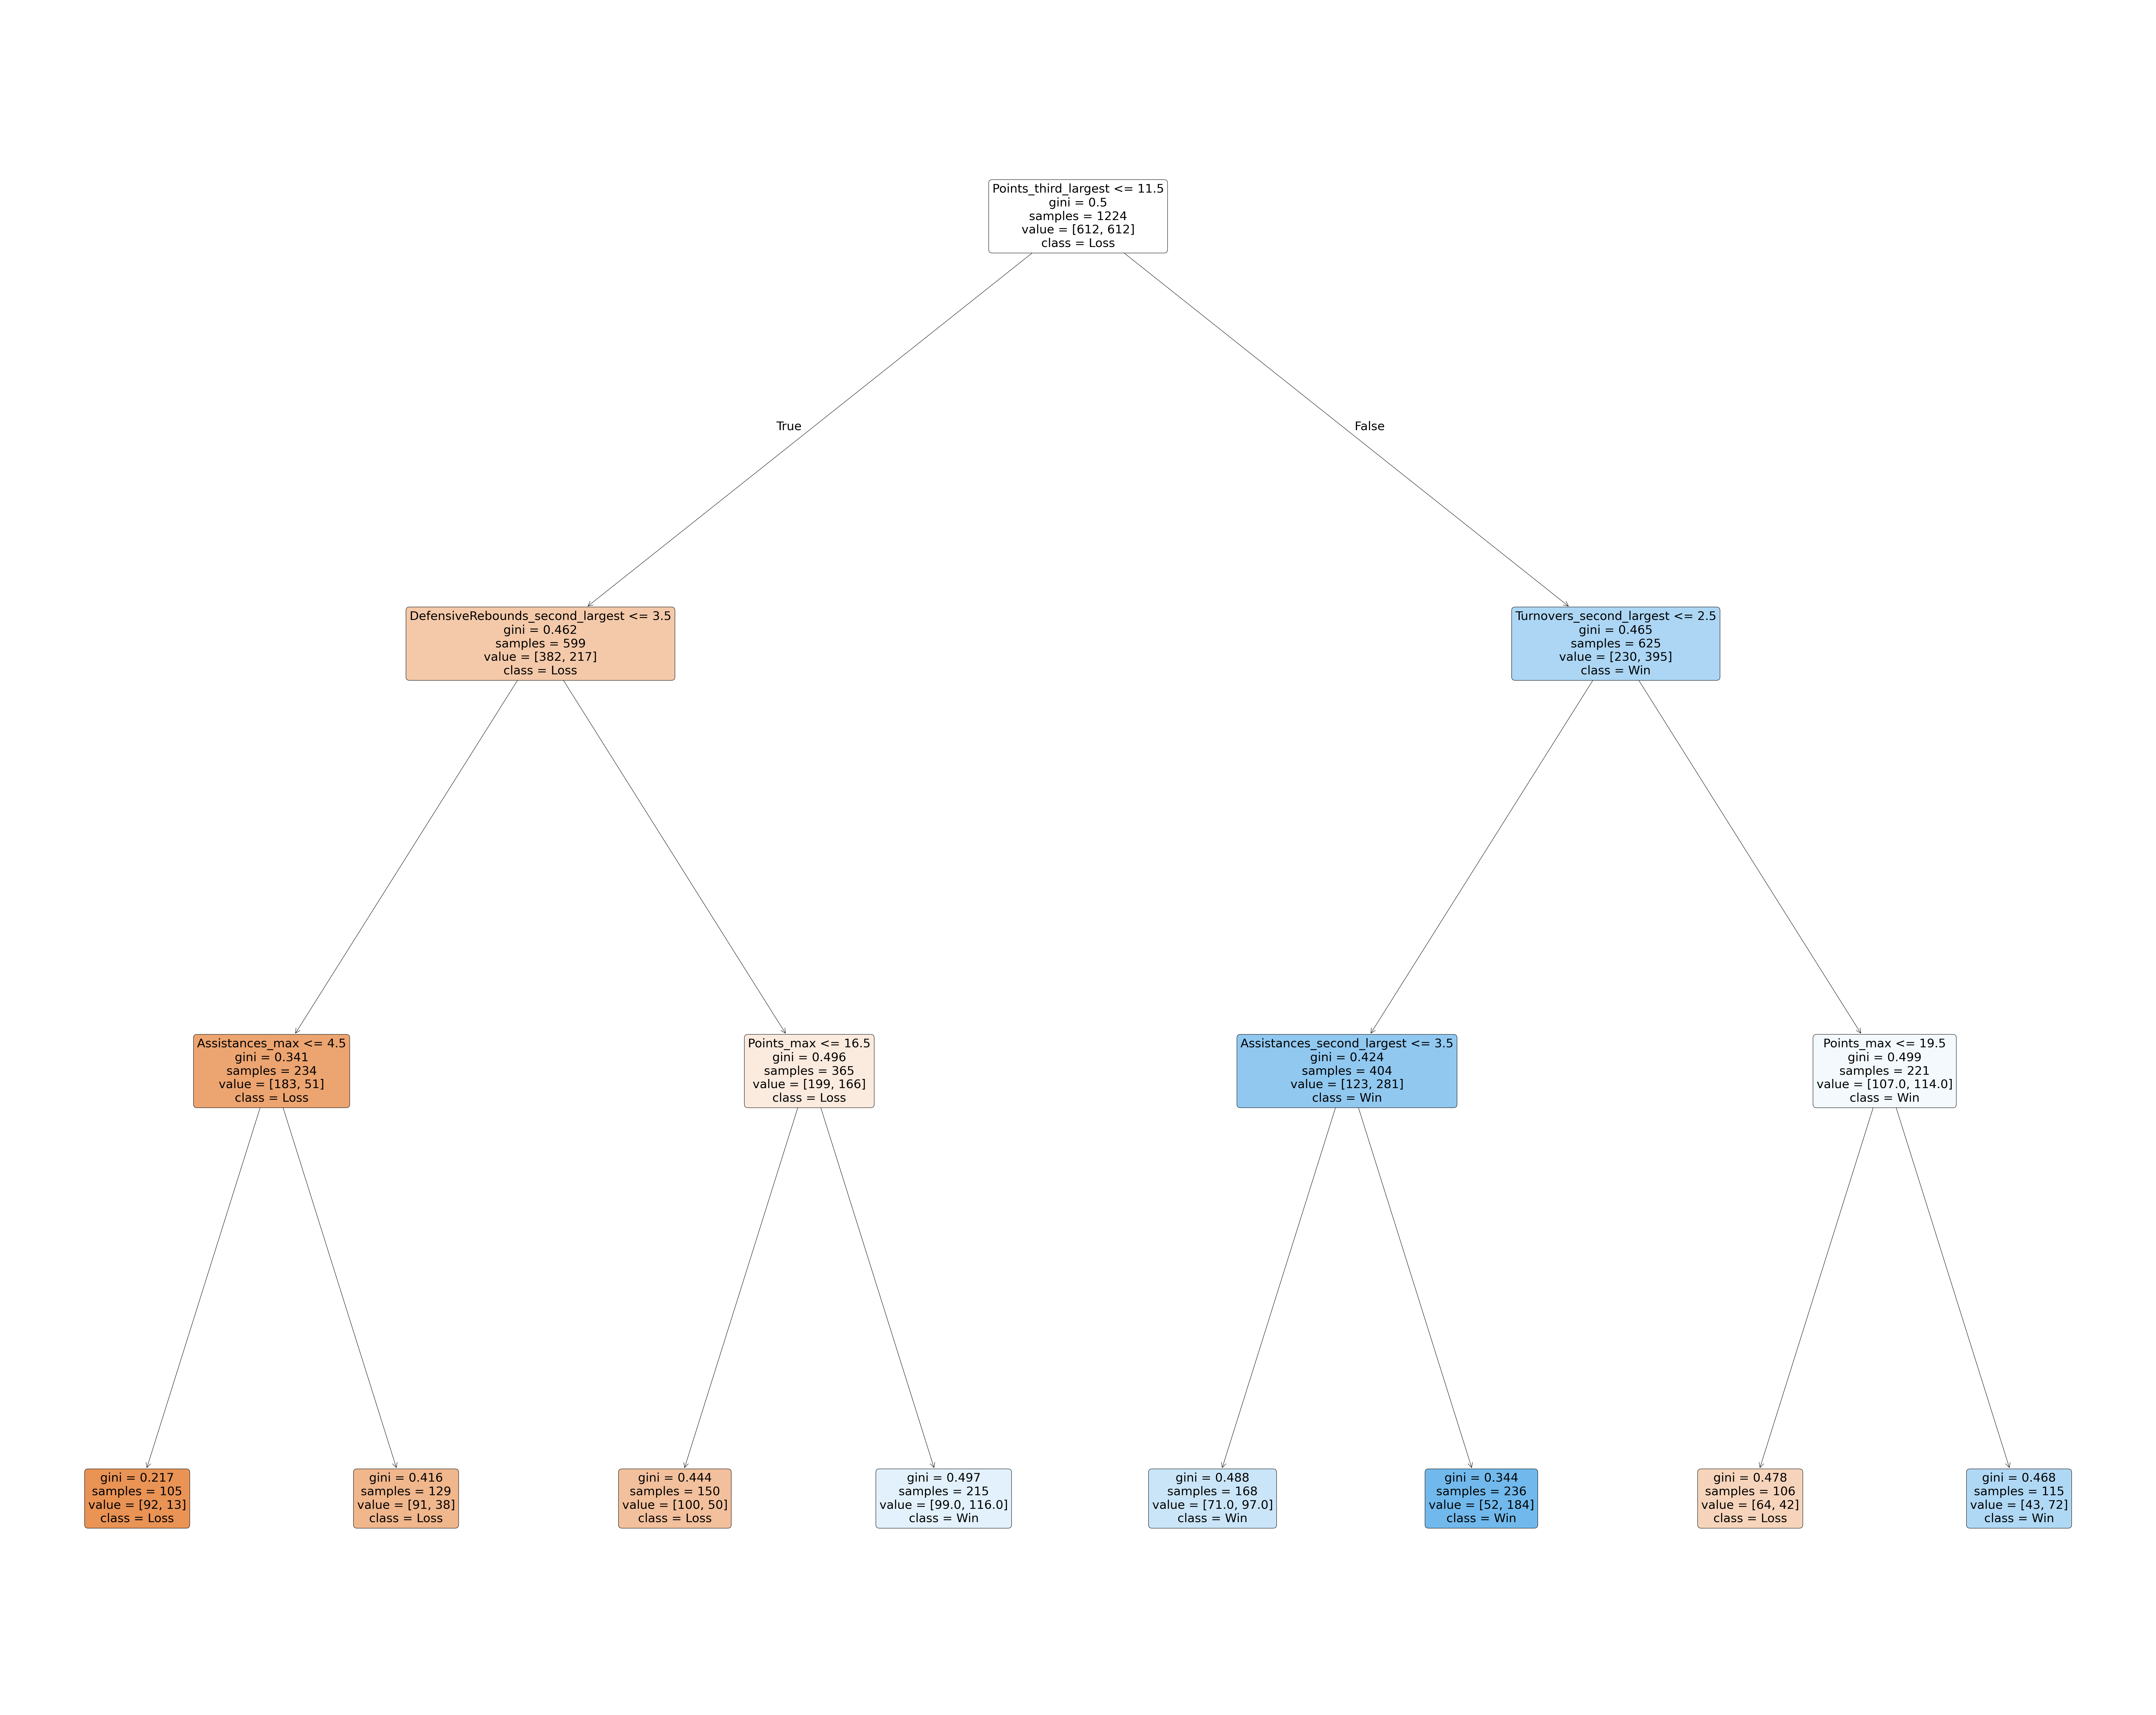

In [25]:

# Définir X et y
X = cart.drop(columns=[col for col in cart.columns if col == 'WINNER' or col.endswith('_sum')])
y = cart['WINNER']  # Variable cible

# Initialiser l'arbre de décision avec les paramètres souhaités
tree_model = DecisionTreeClassifier(
    max_depth=3,                 # Profondeur maximale de l'arbre
    min_samples_leaf=100,         # Minimum d'observations dans chaque feuille
    random_state=42              # Pour reproductibilité
)

# Entraîner le modèle sur toutes les données
tree_model.fit(X, y)

# Prédire sur les mêmes données (pour l'illustration)
y_pred = tree_model.predict(X)

# Évaluer la performance du modèle
accuracy = accuracy_score(y, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher l'arbre de décision
plt.figure(figsize=(100, 80))
plot_tree(tree_model, feature_names=X.columns, class_names=['Loss', 'Win'], filled=True, rounded=True)
plt.show()


In [8]:
from euroleague_api.game_stats import GameStats
import pandas as pd
competition = "euroleague"
season = 2024
round_ = 7

gs_ = GameStats()

C:\Users\guill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
images_df = pd.DataFrame(columns=["TEAM","NAME","PLAYER_ID","NAT","LINK"])


for gc in range(1,7*9+1) :
    print(gc) 
    ggs = gs_.get_game_stats(season=season,game_code = gc)
    ggr = gs_.get_game_report(season=season,game_code = gc)

    for i in range(len(ggs["local.players"].to_list()[0])):
        images = ggs["local.players"].to_list()[0][i]['player']['images']['action']
        player_id = "P" + ggs["local.players"].to_list()[0][i]['player']['person']['code']
        name = ggs["local.players"].to_list()[0][i]['player']['person']['name']
        nat = ggs["local.players"].to_list()[0][i]['player']['person']['country']['code']
        teamcode = ggr['local.club.code'].to_list()[0]
        images_df = pd.concat([images_df, pd.DataFrame([[teamcode,name, player_id, nat, images]], columns=images_df.columns)], ignore_index=True)

    for j in range(len(ggs["road.players"].to_list()[0])):
        images = ggs["road.players"].to_list()[0][j]['player']['images']['action']
        player_id = "P" + ggs["road.players"].to_list()[0][j]['player']['person']['code']
        name = ggs["road.players"].to_list()[0][j]['player']['person']['name']
        nat = ggs["road.players"].to_list()[0][j]['player']['person']['country']['code']
        teamcode = ggr['road.club.code'].to_list()[0]
        images_df = pd.concat([images_df, pd.DataFrame([[teamcode, name,player_id, nat, images]], columns=images_df.columns)], ignore_index=True)

images_df = images_df.drop_duplicates().reset_index(drop = True)

1


KeyboardInterrupt: 

In [29]:
images_df.to_csv("euroleague_2024_df_images_players.csv",index=False)

In [11]:
ggs = gs_.get_game_stats(season=season,game_code = 1)

In [ ]:
for i in ggs.columns.to_list() :
    print(i)

Season
Gamecode
local.coach.code
local.coach.name
local.players
local.team.timePlayed
local.team.valuation
local.team.points
local.team.fieldGoalsMade2
local.team.fieldGoalsAttempted2
local.team.fieldGoalsMade3
local.team.fieldGoalsAttempted3
local.team.freeThrowsMade
local.team.freeThrowsAttempted
local.team.fieldGoalsMadeTotal
local.team.fieldGoalsAttemptedTotal
local.team.accuracyMade
local.team.accuracyAttempted
local.team.totalRebounds
local.team.defensiveRebounds
local.team.offensiveRebounds
local.team.assistances
local.team.steals
local.team.turnovers
local.team.blocksFavour
local.team.blocksAgainst
local.team.foulsCommited
local.team.foulsReceived
local.team.plusMinus
local.total.timePlayed
local.total.valuation
local.total.points
local.total.fieldGoalsMade2
local.total.fieldGoalsAttempted2
local.total.fieldGoalsMade3
local.total.fieldGoalsAttempted3
local.total.freeThrowsMade
local.total.freeThrowsAttempted
local.total.fieldGoalsMadeTotal
local.total.fieldGoalsAttemptedTotal
l

: 

In [12]:
ggs["road.players"].to_list()[0]

[{'player': {'person': {'code': '009622',
    'name': 'BROWN, LORENZO',
    'alias': 'BROWN, LORENZO',
    'aliasRaw': 'BROWN, LORENZO',
    'passportName': 'LORENZO DONTEZ',
    'passportSurname': 'BROWN',
    'jerseyName': 'BROWN',
    'abbreviatedName': 'Brown, L.',
    'country': {'code': 'USA', 'name': 'United States of America'},
    'height': 196,
    'weight': 89,
    'birthDate': '1990-08-26T00:00:00',
    'birthCountry': {'code': 'USA', 'name': 'United States of America'},
    'twitterAccount': 'zo_brown',
    'instagramAccount': 'OfficialZobrown',
    'facebookAccount': '',
    'isReferee': False,
    'images': {}},
   'type': 'J',
   'typeName': 'Player',
   'active': True,
   'startDate': '2024-10-02T13:14:14.679',
   'endDate': '2025-06-30T00:00:00',
   'dorsal': '2',
   'dorsalRaw': '2',
   'position': 1,
   'positionName': 'Guard',
   'lastTeam': 'MACCABI PLAYTIKA TEL AVIV',
   'externalId': 49933,
   'images': {'headshot': 'https://media-cdn.incrowdsports.com/6094f620-

In [18]:
import pycountry
import requests
import os


# Boucle sur chaque pays et télécharge le drapeau
for country in pycountry.countries:
    country_code = country.alpha_3.lower()  # Utilise le code pays à 3 lettres
    url = f"https://flagcdn.com/w320/{country.alpha_2.lower()}.png"  # Flagcdn utilise le code à 2 lettres
    response = requests.get(url)
    
    if response.status_code == 200:
        with open(f"images/flags/{country_code.upper()}.png", "wb") as f:
            f.write(response.content)
        print(f"Drapeau de {country.name} ({country_code}) téléchargé.")
    else:
        print(f"Le drapeau de {country.name} ({country_code}) n'a pas pu être téléchargé.")

Drapeau de Aruba (abw) téléchargé.
Drapeau de Afghanistan (afg) téléchargé.
Drapeau de Angola (ago) téléchargé.
Drapeau de Anguilla (aia) téléchargé.
Drapeau de Åland Islands (ala) téléchargé.
Drapeau de Albania (alb) téléchargé.
Drapeau de Andorra (and) téléchargé.
Drapeau de United Arab Emirates (are) téléchargé.
Drapeau de Argentina (arg) téléchargé.
Drapeau de Armenia (arm) téléchargé.
Drapeau de American Samoa (asm) téléchargé.
Drapeau de Antarctica (ata) téléchargé.
Drapeau de French Southern Territories (atf) téléchargé.
Drapeau de Antigua and Barbuda (atg) téléchargé.
Drapeau de Australia (aus) téléchargé.
Drapeau de Austria (aut) téléchargé.
Drapeau de Azerbaijan (aze) téléchargé.
Drapeau de Burundi (bdi) téléchargé.
Drapeau de Belgium (bel) téléchargé.
Drapeau de Benin (ben) téléchargé.
Drapeau de Bonaire, Sint Eustatius and Saba (bes) téléchargé.
Drapeau de Burkina Faso (bfa) téléchargé.
Drapeau de Bangladesh (bgd) téléchargé.
Drapeau de Bulgaria (bgr) téléchargé.
Drapeau de

'ZIM'